In [2]:
pip install qiskit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 67.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 8.3 MB/s eta 0:00:00


In [3]:
pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 44.3 MB/s eta 0:00:00


firsr 2 is the quantum wires and second one is classical wires in the quantum circuit

In [4]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(2,2)
qc.draw()

q_0: 
     
q_1: 
     
c: 2/

In [5]:
from qiskit import QuantumCircuit , assemble
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram , plot_bloch_multivector
from math import pi, sqrt
from qiskit.quantum_info import Statevector  #import the state vector class

sim = Aer.get_backend('aer_simulator')
qc = QuantumCircuit(2)   # create a quantum circuit with one cubit
initial_state = [1,0]   # define initial_state as |1>
qc.initialize(initial_state, 0) #apply initialisation operation to the 0th qubit
qc.save_statevector()  #tell simulator to save state vector

#instead of assembling before running , run the circuit directly:
result = sim.run(qc).result() #do the simulation and return the result

#assemble the circuit for later if needed:
qobj = assemble(qc) #create a Qobj from the circuit for the simulator to run , if required for other purposes

out_state = result.get_statevector() #extract the output statevector
print(out_state) # display the output state vector

qc.measure_all()
qc.draw()

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


<ipython-input-5-32aa81ed4edc>:17: DeprecationWarning: The function ``qiskit.compiler.assembler.assemble()`` is deprecated as of qiskit 1.2. It will be removed in the 2.0 release. The `Qobj` class and related functionality are part of the deprecated `BackendV1` workflow,  and no longer necessary for `BackendV2`. If a user workflow requires `Qobj` it likely relies on deprecated functionality and should be updated to use `BackendV2`.
  qobj = assemble(qc) #create a Qobj from the circuit for the simulator to run , if required for other purposes


┌─────────────────┐ statevector  ░ ┌─┐   
   q_0: ┤ Initialize(1,0) ├──────░───────░─┤M├───
        └─────────────────┘      ░       ░ └╥┘┌─┐
   q_1: ─────────────────────────░───────░──╫─┤M├
                                 ░       ░  ║ └╥┘
meas: 2/════════════════════════════════════╩══╩═
                                            0  1

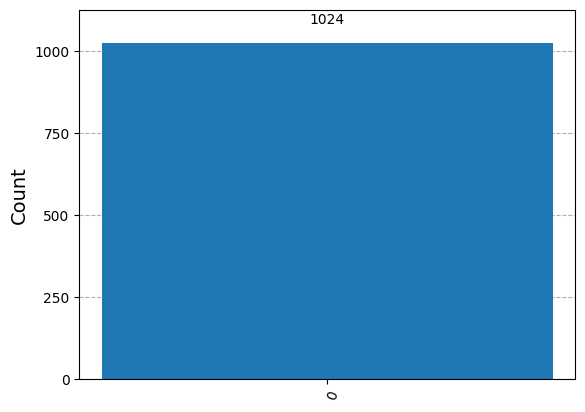

In [ ]:
from qiskit import QuantumCircuit , assemble
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram , plot_bloch_multivector
from math import pi, sqrt
from qiskit.quantum_info import Statevector  #import the state vector class

sim = Aer.get_backend('aer_simulator')
qc = QuantumCircuit(1)   # create a quantum circuit with one cubit
initial_state = [1,0]   # define initial_state as |1>
qc.initialize(initial_state, 0) #apply initialisation operation to the 0th qubit
#qc.save_statevector()  tell simulator to save state vector

qc.measure_all()

#instead of assembling before running , run the circuit directly:
result = sim.run(qc).result() #do the simulation and return the result
counts = result.get_counts()
plot_histogram(counts)


Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


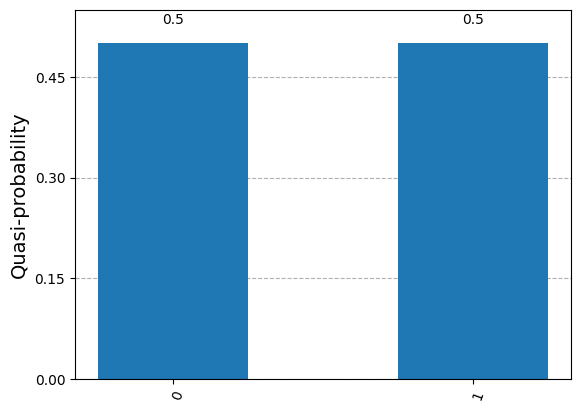

In [ ]:
initial_state = [1/sqrt(2),1/sqrt(2)]
qc= QuantumCircuit(1)
qc.initialize(initial_state,0)
qc.save_statevector()
state= sim.run(qc).result().get_statevector()
print(state)
results= sim.run(qc).result().get_counts()
plot_histogram(results)